<a href="https://colab.research.google.com/github/thngoc17/Fundamentals-of-AI--Lab-1/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**


In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# **PSO by NumPy only**

## Class PSO

In [ ]:
class ParticleSwarmOptimizer:
    """
    Particle Swarm Optimization implementation using NumPy.

    Parameters:
    -----------
    n_particles : int
        Number of particles in the swarm
    n_dimensions : int
        Number of dimensions in the search space
    bounds : tuple of arrays
        (lower_bounds, upper_bounds) for each dimension
    w : float
        Inertia weight (controls previous velocity influence)
    c1 : float
        Cognitive parameter (personal best influence)
    c2 : float
        Social parameter (global best influence)
    max_iterations : int
        Maximum number of iterations

    Complexity:
    -----------
    Time: O(max_iterations * n_particles * n_dimensions)
    Space: O(n_particles * n_dimensions)
    """

    def __init__(self, n_particles=30, n_dimensions=2, bounds=None,
                 w=0.7, c1=1.5, c2=1.5, max_iterations=100):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iterations = max_iterations

        # Set default bounds if not provided
        if bounds is None:
            self.lower_bounds = np.full(n_dimensions, -10.0)
            self.upper_bounds = np.full(n_dimensions, 10.0)
        else:
            self.lower_bounds = np.array(bounds[0])
            self.upper_bounds = np.array(bounds[1])

        # Initialize particles
        self.positions = np.random.uniform(
            self.lower_bounds,
            self.upper_bounds,
            (n_particles, n_dimensions)
        )

        # Initialize velocities
        velocity_range = (self.upper_bounds - self.lower_bounds) * 0.1
        self.velocities = np.random.uniform(
            -velocity_range,
            velocity_range,
            (n_particles, n_dimensions)
        )

        # Personal best positions and scores
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(n_particles, np.inf)

        # Global best position and score
        self.global_best_position = None
        self.global_best_score = np.inf

        # History
        self.history = []

    def optimize(self, objective_function, verbose=True):
        """
        Run the PSO optimization.

        Parameters:
        -----------
        objective_function : callable
            Function to minimize. Should accept a 1D numpy array and return a scalar.
        verbose : bool
            Whether to print progress

        Returns:
        --------
        tuple : (best_position, best_score, history)
        """

        for iteration in range(self.max_iterations):
            # Evaluate all particles
            for i in range(self.n_particles):
                score = objective_function(self.positions[i])

                # Update personal best
                if score < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = score
                    self.personal_best_positions[i] = self.positions[i].copy()

                # Update global best
                if score < self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = self.positions[i].copy()

            # Store history
            self.history.append(self.global_best_score)

            if verbose and (iteration % 10 == 0 or iteration == self.max_iterations - 1):
                print(f"Iteration {iteration}: Best Score = {self.global_best_score:.6f}")

            # Update velocities and positions
            r1 = np.random.random((self.n_particles, self.n_dimensions))
            r2 = np.random.random((self.n_particles, self.n_dimensions))

            cognitive = self.c1 * r1 * (self.personal_best_positions - self.positions)
            social = self.c2 * r2 * (self.global_best_position - self.positions)

            self.velocities = self.w * self.velocities + cognitive + social
            self.positions = self.positions + self.velocities

            # Apply bounds
            self.positions = np.clip(self.positions, self.lower_bounds, self.upper_bounds)

        return self.global_best_position, self.global_best_score, self.history

## Testing PSO

In [ ]:
def sphere_function(x):
    """Simple sphere function: f(x) = sum(x^2), minimum at origin"""
    return np.sum(x**2)

def rastrigin_function(x):
    """Rastrigin function: highly multimodal, minimum at origin"""
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def rosenbrock_function(x):
    """Rosenbrock function: valley-shaped, minimum at (1,1,...)"""
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# --- Demo ---
print("=" * 60)
print("Particle Swarm Optimization Demo")
print("=" * 60)

# Example 1: Sphere Function (2D)
print("\n1. Optimizing Sphere Function (2D)")
print("   f(x) = x1^2 + x2^2")
print("   Global minimum: f(0, 0) = 0")
print("-" * 60)

pso = ParticleSwarmOptimizer(
    n_particles=100,
    n_dimensions=2,
    bounds=([-5, -5], [5, 5]),
    max_iterations=50
)

best_pos, best_score, history = pso.optimize(sphere_function)
print(f"\nResult: f({best_pos}) = {best_score:.8f}")

# Example 2: Rastrigin Function (5D)
print("\n" + "=" * 60)
print("2. Optimizing Rastrigin Function (5D)")
print("   Highly multimodal function")
print("   Global minimum: f(0, 0, 0, 0, 0) = 0")
print("-" * 60)

pso = ParticleSwarmOptimizer(
    n_particles=50,
    n_dimensions=5,
    bounds=([-5.12]*5, [5.12]*5),
    max_iterations=100
)

best_pos, best_score, history = pso.optimize(rastrigin_function)
print(f"\nResult: f({best_pos}) = {best_score:.8f}")

# Example 3: Rosenbrock Function (3D)
print("\n" + "=" * 60)
print("3. Optimizing Rosenbrock Function (3D)")
print("   Valley-shaped function")
print("   Global minimum: f(1, 1, 1) = 0")
print("-" * 60)

pso = ParticleSwarmOptimizer(
    n_particles=40,
    n_dimensions=3,
    bounds=([-2, -2, -2], [2, 2, 2]),
    w=0.6,
    c1=2.0,
    c2=2.0,
    max_iterations=100
)

best_pos, best_score, history = pso.optimize(rosenbrock_function)
print(f"\nResult: f({best_pos}) = {best_score:.8f}")

print("\n" + "=" * 60)

Particle Swarm Optimization Demo

1. Optimizing Sphere Function (2D)
   f(x) = x1^2 + x2^2
   Global minimum: f(0, 0) = 0
------------------------------------------------------------
Iteration 0: Best Score = 0.008483
Iteration 10: Best Score = 0.000461
Iteration 20: Best Score = 0.000043
Iteration 30: Best Score = 0.000001
Iteration 40: Best Score = 0.000000
Iteration 49: Best Score = 0.000000

Result: f([-1.40470840e-05 -3.07568787e-05]) = 0.00000000

2. Optimizing Rastrigin Function (5D)
   Highly multimodal function
   Global minimum: f(0, 0, 0, 0, 0) = 0
------------------------------------------------------------
Iteration 0: Best Score = 34.683836
Iteration 10: Best Score = 13.277955
Iteration 20: Best Score = 10.487962
Iteration 30: Best Score = 7.962244
Iteration 40: Best Score = 6.719355
Iteration 50: Best Score = 4.697081
Iteration 60: Best Score = 4.030558
Iteration 70: Best Score = 2.120507
Iteration 80: Best Score = 2.015207
Iteration 90: Best Score = 2.010035
Iteration 9

# **Comparison**

## Implement hill climbing and simulated annealing



In [ ]:
class HillClimbing:
    """
    Steepest-ascent Hill Climbing implementation.

    Parameters:
    -----------
    objective_function : callable
        Function to minimize. Should accept a 1D numpy array and return a scalar.
    bounds : tuple of arrays
        (lower_bounds, upper_bounds) for each dimension
    max_iterations : int
        Maximum number of iterations
    step_size : float
        The maximum random adjustment size for generating neighbors.

    Complexity:
    -----------
    Time: O(max_iterations * n_neighbors * dimensions) - In this case, n_neighbors = 10
    Space: O(dimensions)
    """

    def __init__(self, objective_function, bounds, max_iterations=1000, step_size=0.1):
        self.objective_function = objective_function
        self.lower_bounds = np.array(bounds[0])
        self.upper_bounds = np.array(bounds[1])
        self.max_iterations = max_iterations
        self.step_size = step_size
        self.history = []

    def optimize(self, initial_solution, verbose=True):
        """
        Run the Hill Climbing optimization.

        Parameters:
        -----------
        initial_solution : 1D numpy array
            The starting point for the search.
        verbose : bool
            Whether to print progress

        Returns:
        --------
        tuple : (best_position, best_score, history)
        """
        current_solution = np.array(initial_solution)
        current_score = self.objective_function(current_solution)
        best_score = current_score
        best_position = current_solution.copy()

        for iteration in range(self.max_iterations):
            neighbors = []
            for _ in range(10): # Generate a few neighbors (n_neighbors)
                neighbor = current_solution + np.random.uniform(-self.step_size, self.step_size, size=len(current_solution))
                neighbor = np.clip(neighbor, self.lower_bounds, self.upper_bounds)
                neighbors.append(neighbor)

            best_neighbor = current_solution.copy()
            best_neighbor_score = current_score

            for neighbor in neighbors:
                neighbor_score = self.objective_function(neighbor)
                if neighbor_score < best_neighbor_score:
                    best_neighbor_score = neighbor_score
                    best_neighbor = neighbor.copy()

            if best_neighbor_score < current_score:
                current_solution = best_neighbor
                current_score = best_neighbor_score

                if current_score < best_score:
                    best_score = current_score
                    best_position = current_solution.copy()

            self.history.append(best_score)

            if verbose and (iteration % 100 == 0 or iteration == self.max_iterations - 1):
                 print(f"Iteration {iteration}: Best Score = {best_score:.6f}")


        return best_position, best_score, self.history

In [ ]:
class SimulatedAnnealing:
    """
    Simulated Annealing implementation.

    Parameters:
    -----------
    objective_function : callable
        Function to minimize. Should accept a 1D numpy array and return a scalar.
    bounds : tuple of arrays
        (lower_bounds, upper_bounds) for each dimension
    max_iterations : int
        Maximum number of iterations
    initial_temperature : float
        Starting temperature for the annealing process.
    cooling_rate : float
        Rate at which the temperature decreases (e.g., 0.99).
    step_size : float
        The maximum random adjustment size for generating neighbors.

    Complexity:
    -----------
    Time: O(max_iterations * dimensions)
    Space: O(dimensions)
    """

    def __init__(self, objective_function, bounds, max_iterations=1000,
                 initial_temperature=100.0, cooling_rate=0.99, step_size=0.1):
        self.objective_function = objective_function
        self.lower_bounds = np.array(bounds[0])
        self.upper_bounds = np.array(bounds[1])
        self.max_iterations = max_iterations
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.step_size = step_size
        self.history = []

    def optimize(self, initial_solution, verbose=True):
        """
        Run the Simulated Annealing optimization.

        Parameters:
        -----------
        initial_solution : 1D numpy array
            The starting point for the search.
        verbose : bool
            Whether to print progress

        Returns:
        --------
        tuple : (best_position, best_score, history)
        """
        current_solution = np.array(initial_solution)
        current_score = self.objective_function(current_solution)
        best_solution = current_solution.copy()
        best_score = current_score
        temperature = self.initial_temperature

        for iteration in range(self.max_iterations):
            # Generate a neighbor
            neighbor = current_solution + np.random.uniform(-self.step_size, self.step_size, size=len(current_solution))
            neighbor = np.clip(neighbor, self.lower_bounds, self.upper_bounds)
            neighbor_score = self.objective_function(neighbor)

            # Calculate acceptance probability
            delta_score = neighbor_score - current_score
            if delta_score < 0:  # Accept better solutions
                accept_prob = 1.0
            else:
                # Accept worse solutions with a probability based on temperature
                if temperature > 1e-9: # Avoid division by zero or very small temperatures
                    accept_prob = np.exp(-delta_score / temperature)
                else:
                    accept_prob = 0.0


            # Decide whether to accept the neighbor
            if accept_prob > np.random.random():
                current_solution = neighbor
                current_score = neighbor_score

            # Update best solution found so far
            if current_score < best_score:
                best_score = current_score
                best_solution = current_solution.copy()

            # Cool down the temperature
            temperature *= self.cooling_rate

            self.history.append(best_score)

            if verbose and (iteration % 100 == 0 or iteration == self.max_iterations - 1):
                 print(f"Iteration {iteration}: Best Score = {best_score:.6f}, Temp = {temperature:.6f}")


        return best_solution, best_score, self.history

## Convergence comparison

In [ ]:
num_runs = 30

sphere_n_dimensions = 30
sphere_bounds = ([-10] * sphere_n_dimensions, [10] * sphere_n_dimensions)

rastrigin_n_dimensions = 30
rastrigin_bounds = ([-10] * rastrigin_n_dimensions, [10] * rastrigin_n_dimensions)

rosenbrock_n_dimensions = 100
rosenbrock_bounds = ([-10] * rosenbrock_n_dimensions, [10] * rosenbrock_n_dimensions)

sphere_params = {
    'PSO': {
        'n_particles': 100,
        'n_dimensions': sphere_n_dimensions,
        'bounds': sphere_bounds,
        'max_iterations': 500
    },
    'Hill_Climbing': {
        'bounds': sphere_bounds,
        'max_iterations': 500, # More iterations for comparison
        'step_size': 0.5 # Reasonable step size
    },
    'Simulated_Annealing': {
        'bounds': sphere_bounds,
        'max_iterations': 500, # More iterations for comparison
        'initial_temperature': 100.0,
        'cooling_rate': 0.95,
        'step_size': 0.5 # Reasonable step size
    }
}


rastrigin_params = {
    'PSO': {
        'n_particles': 200,
        'n_dimensions': rastrigin_n_dimensions,
        'bounds': rastrigin_bounds,
        'max_iterations': 2000
    },
    'Hill_Climbing': {
        'bounds': rastrigin_bounds,
        'max_iterations': 5000,
        'step_size': 1.5 # Larger step size for higher dimension
    },
    'Simulated_Annealing': {
        'bounds': rastrigin_bounds,
        'max_iterations': 5000,
        'initial_temperature': 200.0, # Higher initial temperature
        'cooling_rate': 0.95,
        'step_size': 1.5 # Larger step size for higher dimension
    }
}


rosenbrock_params = {
    'PSO': {
        'n_particles': 200,
        'n_dimensions': rosenbrock_n_dimensions,
        'bounds': rosenbrock_bounds,
        'w': 0.6,
        'c1': 2.0,
        'c2': 2.0,
        'max_iterations': 2000
    },
    'Hill_Climbing': {
        'bounds': rosenbrock_bounds,
        'max_iterations': 2000,
        'step_size': 0.3 # Moderate step size
    },
    'Simulated_Annealing': {
        'bounds': rosenbrock_bounds,
        'max_iterations': 2000,
        'initial_temperature': 150.0, # Moderate initial temperature
        'cooling_rate': 0.95,
        'step_size': 0.3 # Moderate step size
    }
}

# 5. Generate initial solutions for each function
np.random.seed(42) # for reproducibility

sphere_initial_solutions = np.random.uniform(
    sphere_bounds[0],
    sphere_bounds[1],
    (num_runs, sphere_n_dimensions)
)

rastrigin_initial_solutions = np.random.uniform(
    rastrigin_bounds[0],
    rastrigin_bounds[1],
    (num_runs, rastrigin_n_dimensions)
)

rosenbrock_initial_solutions = np.random.uniform(
    rosenbrock_bounds[0],
    rosenbrock_bounds[1],
    (num_runs, rosenbrock_n_dimensions)
)

print(f"Number of runs set to: {num_runs}")
print("\nSphere function parameters defined.")
print("Rastrigin function parameters defined.")
print("Rosenbrock function parameters defined.")
print(f"\nGenerated {num_runs} initial solutions for each function.")

Number of runs set to: 30

Sphere function parameters defined.
Rastrigin function parameters defined.
Rosenbrock function parameters defined.

Generated 30 initial solutions for each function.


In [ ]:
# Create a list of objective functions and their corresponding parameters and initial solutions
objective_functions = {
    'Sphere': sphere_function,
    'Rastrigin': rastrigin_function,
    'Rosenbrock': rosenbrock_function
}

params = {
    'Sphere': sphere_params,
    'Rastrigin': rastrigin_params,
    'Rosenbrock': rosenbrock_params
}

initial_solutions = {
    'Sphere': sphere_initial_solutions,
    'Rastrigin': rastrigin_initial_solutions,
    'Rosenbrock': rosenbrock_initial_solutions
}

# Initialize a dictionary to store the results
results = {}

print("=" * 60)
print("Running Optimization Experiments")
print("=" * 60)

# Iterate through each objective function
for func_name, obj_func in objective_functions.items():
    print(f"\nRunning experiments for: {func_name}")
    print("-" * 60)

    results[func_name] = {}
    func_params = params[func_name]
    func_initial_solutions = initial_solutions[func_name]

    # Iterate through each algorithm
    for algo_name in ['PSO', 'Hill_Climbing', 'Simulated_Annealing']:
        print(f"  Algorithm: {algo_name}")

        best_scores_list = []
        history_list = []

        algo_params = func_params[algo_name]

        # Run multiple independent runs
        for run in range(num_runs):
            if run % 5 == 0: # Print progress every 5 runs
                 print(f"    Run {run+1}/{num_runs}...")

            initial_sol = func_initial_solutions[run]

            # Instantiate and run the optimizer
            if algo_name == 'PSO':
                optimizer = ParticleSwarmOptimizer(**algo_params)
                best_pos, best_score, history = optimizer.optimize(obj_func, verbose=False) # Set verbose to False for cleaner output during runs
            elif algo_name == 'Hill_Climbing':
                optimizer = HillClimbing(obj_func, **algo_params)
                best_pos, best_score, history = optimizer.optimize(initial_sol, verbose=False) # Set verbose to False
            elif algo_name == 'Simulated_Annealing':
                optimizer = SimulatedAnnealing(obj_func, **algo_params)
                best_pos, best_score, history = optimizer.optimize(initial_sol, verbose=False) # Set verbose to False

            # Store results for this run
            best_scores_list.append(best_score)
            history_list.append(history)

        # Store results for this algorithm and objective function
        results[func_name][algo_name] = {
            'best_scores': best_scores_list,
            'history': history_list
        }
        print(f"  Finished {num_runs} runs for {algo_name} on {func_name}.")

print("\n" + "=" * 60)
print("Optimization experiments completed.")
print("=" * 60)

# The 'results' dictionary now contains the data needed for analysis.

Running Optimization Experiments

Running experiments for: Sphere
------------------------------------------------------------
  Algorithm: PSO
    Run 1/30...
    Run 6/30...
    Run 11/30...
    Run 16/30...
    Run 21/30...
    Run 26/30...
  Finished 30 runs for PSO on Sphere.
  Algorithm: Hill_Climbing
    Run 1/30...
    Run 6/30...
    Run 11/30...
    Run 16/30...
    Run 21/30...
    Run 26/30...
  Finished 30 runs for Hill_Climbing on Sphere.
  Algorithm: Simulated_Annealing
    Run 1/30...
    Run 6/30...
    Run 11/30...
    Run 16/30...
    Run 21/30...
    Run 26/30...
  Finished 30 runs for Simulated_Annealing on Sphere.

Running experiments for: Rastrigin
------------------------------------------------------------
  Algorithm: PSO
    Run 1/30...
    Run 6/30...
    Run 11/30...
    Run 16/30...
    Run 21/30...
    Run 26/30...
  Finished 30 runs for PSO on Rastrigin.
  Algorithm: Hill_Climbing
    Run 1/30...
    Run 6/30...
    Run 11/30...
    Run 16/30...
    Run 

In [ ]:
# 1. Calculate and compare average and standard deviation of best fitness
analysis_results = {}

print("=" * 60)
print("Analysis of Optimization Results")
print("=" * 60)

for func_name, algo_results in results.items():
    print(f"\nAnalyzing results for: {func_name}")
    print("-" * 60)

    analysis_results[func_name] = {}

    for algo_name, data in algo_results.items():
        best_scores = np.array(data['best_scores'])
        avg_best_fitness = np.mean(best_scores)
        std_best_fitness = np.std(best_scores)

        analysis_results[func_name][algo_name] = {
            'avg_best_fitness': avg_best_fitness,
            'std_best_fitness': std_best_fitness,
            'history': data['history'] # Keep history for convergence analysis
        }

        print(f"  {algo_name}: Avg Best Fitness = {avg_best_fitness:.6f}, Std Dev Best Fitness = {std_best_fitness:.6f}")

# 2. Prepare history data for convergence analysis
# We'll store the average history across runs for plotting convergence curves
avg_history = {}

for func_name, algo_results in analysis_results.items():
    avg_history[func_name] = {}
    for algo_name, data in algo_results.items():
        histories = np.array(data['history'])

        # Pad histories with the last value if they have different lengths
        max_len = max(len(h) for h in histories)
        padded_histories = []
        for h in histories:
            padded_h = np.pad(h, (0, max_len - len(h)), 'edge')
            padded_histories.append(padded_h)

        avg_hist = np.mean(padded_histories, axis=0)
        avg_history[func_name][algo_name] = avg_hist

print("\nCalculated average best fitness and standard deviation for all runs.")
print("Prepared average history data for convergence analysis.")

Analysis of Optimization Results

Analyzing results for: Sphere
------------------------------------------------------------
  PSO: Avg Best Fitness = 0.000000, Std Dev Best Fitness = 0.000000
  Hill_Climbing: Avg Best Fitness = 1.749090, Std Dev Best Fitness = 0.164127
  Simulated_Annealing: Avg Best Fitness = 8.507283, Std Dev Best Fitness = 2.303550

Analyzing results for: Rastrigin
------------------------------------------------------------
  PSO: Avg Best Fitness = 57.541671, Std Dev Best Fitness = 16.741838
  Hill_Climbing: Avg Best Fitness = 264.055177, Std Dev Best Fitness = 25.730383
  Simulated_Annealing: Avg Best Fitness = 342.649821, Std Dev Best Fitness = 46.373308

Analyzing results for: Rosenbrock
------------------------------------------------------------
  PSO: Avg Best Fitness = 1177559.401609, Std Dev Best Fitness = 971462.287136
  Hill_Climbing: Avg Best Fitness = 1252.483243, Std Dev Best Fitness = 213.121315
  Simulated_Annealing: Avg Best Fitness = 6123.993803,


Visualizing Convergence Curves


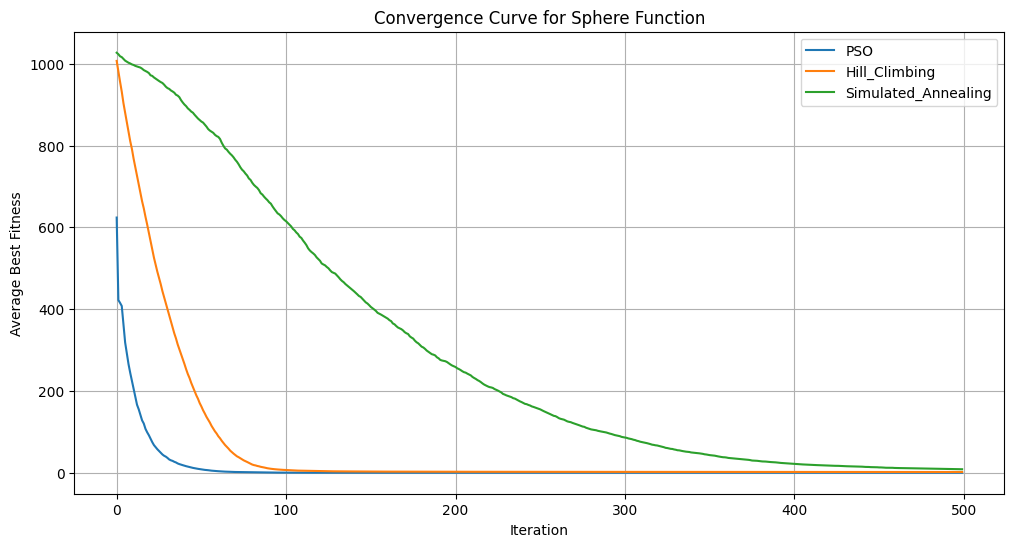

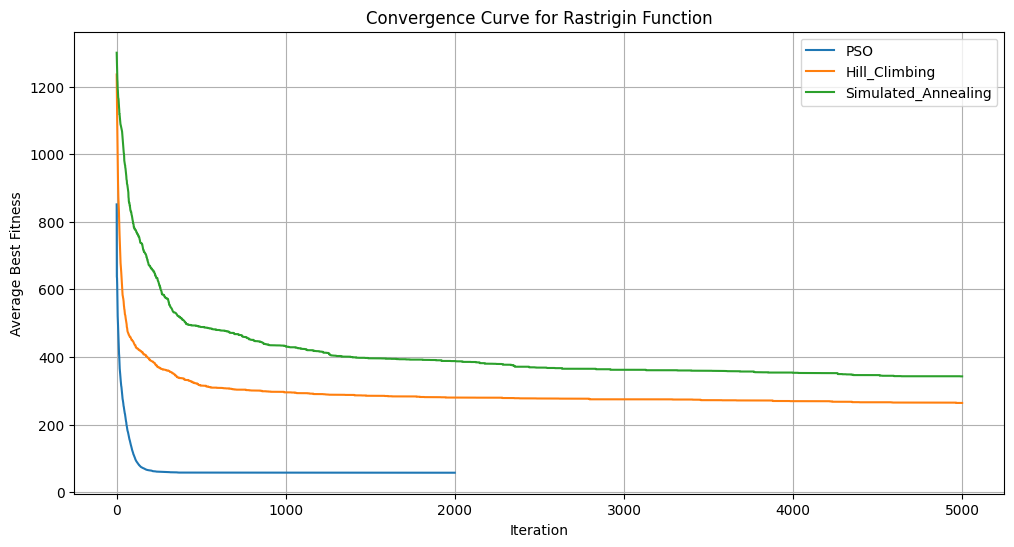

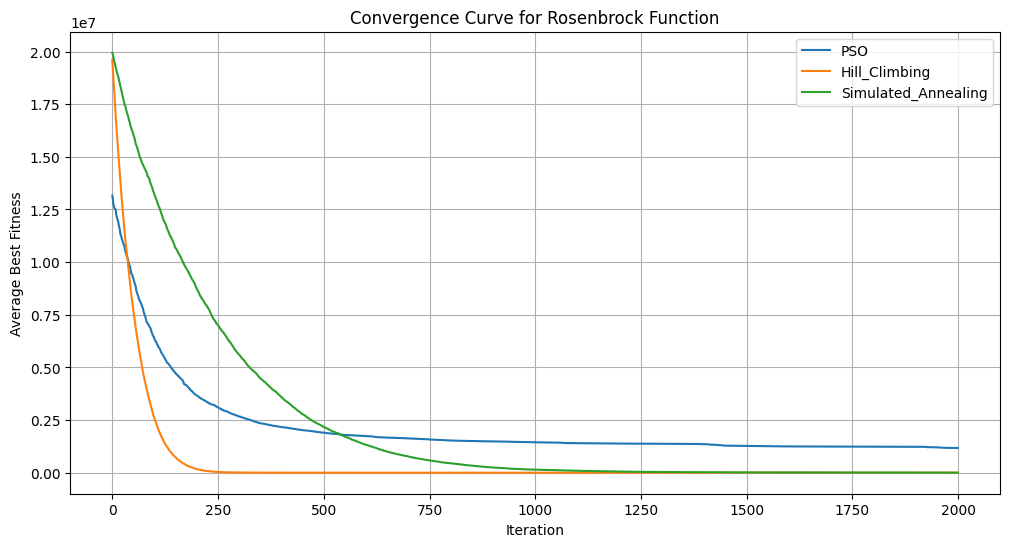


Generated convergence plots for all objective functions.


In [ ]:
# 3. Visualize convergence speed
print("\n" + "=" * 60)
print("Visualizing Convergence Curves")
print("=" * 60)

for func_name, algo_histories in avg_history.items():
    plt.figure(figsize=(12, 6))
    for algo_name, history in algo_histories.items():
        iterations = range(len(history))
        plt.plot(iterations, history, label=algo_name)

    plt.xlabel("Iteration")
    plt.ylabel("Average Best Fitness")
    plt.title(f"Convergence Curve for {func_name} Function")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\nGenerated convergence plots for all objective functions.")

## Runtime comparison


In [ ]:
# Define different dimensions to test
dimensions_to_test = [2, 10, 30, 50]
num_runs = 30

# Update parameter dictionaries to handle varying dimensions
def create_params(dimensions, bounds_range, pso_base_params, hc_base_params, sa_base_params):
    params = {}
    for dim in dimensions:
        lower_bounds = [bounds_range[0]] * dim
        upper_bounds = [bounds_range[1]] * dim
        bounds = (lower_bounds, upper_bounds)

        params[dim] = {
            'PSO': {
                'n_particles': pso_base_params['n_particles'],
                'n_dimensions': dim,
                'bounds': bounds,
                'max_iterations': pso_base_params['max_iterations']
            },
            'Hill_Climbing': {
                'bounds': bounds,
                'max_iterations': hc_base_params['max_iterations'],
                'step_size': hc_base_params['step_size'] * (dim/30) # Adjust step size based on dimension
            },
            'Simulated_Annealing': {
                'bounds': bounds,
                'max_iterations': sa_base_params['max_iterations'],
                'initial_temperature': sa_base_params['initial_temperature'],
                'cooling_rate': sa_base_params['cooling_rate'],
                'step_size': sa_base_params['step_size'] * (dim/30) # Adjust step size based on dimension
            }
        }
        # Add function-specific PSO parameters if they exist
        if 'w' in pso_base_params:
             params[dim]['PSO']['w'] = pso_base_params['w']
        if 'c1' in pso_base_params:
             params[dim]['PSO']['c1'] = pso_base_params['c1']
        if 'c2' in pso_base_params:
             params[dim]['PSO']['c2'] = pso_base_params['c2']


    return params

# Base parameters for each function and algorithm, independent of dimension (mostly)
sphere_base_pso_params = {'n_particles': 100, 'max_iterations': 300}
sphere_base_hc_params = {'max_iterations': 100 * 20, 'step_size': 0.5}
sphere_base_sa_params = {'max_iterations': 100 * 20, 'initial_temperature': 100.0, 'cooling_rate': 0.95, 'step_size': 0.5}
sphere_params = create_params(dimensions_to_test, (-10, 10), sphere_base_pso_params, sphere_base_hc_params, sphere_base_sa_params)


rastrigin_base_pso_params = {'n_particles': 50, 'max_iterations': 500}
rastrigin_base_hc_params = {'max_iterations': 100 * 20, 'step_size': 1.0}
rastrigin_base_sa_params = {'max_iterations': 100 * 20, 'initial_temperature': 200.0, 'cooling_rate': 0.95, 'step_size': 1.0}
rastrigin_params = create_params(dimensions_to_test, (-10, 10), rastrigin_base_pso_params, rastrigin_base_hc_params, rastrigin_base_sa_params)


rosenbrock_base_pso_params = {'n_particles': 40, 'max_iterations': 500, 'w': 0.6, 'c1': 2.0, 'c2': 2.0}
rosenbrock_base_hc_params = {'max_iterations': 100 * 20, 'step_size': 0.3}
rosenbrock_base_sa_params = {'max_iterations': 100 * 20, 'initial_temperature': 150.0, 'cooling_rate': 0.95, 'step_size': 0.3}
rosenbrock_params = create_params(dimensions_to_test, (-10, 10), rosenbrock_base_pso_params, rosenbrock_base_hc_params, rosenbrock_base_sa_params)


# Generate initial solutions for each function and dimension
initial_solutions = {}
np.random.seed(42) # for reproducibility

for dim in dimensions_to_test:
    sphere_bounds = ([-10] * dim, [10] * dim)
    rastrigin_bounds = ([-10] * dim, [10] * dim)
    rosenbrock_bounds = ([-10] * dim, [10] * dim)

    initial_solutions[dim] = {
        'Sphere': np.random.uniform(sphere_bounds[0], sphere_bounds[1], (num_runs, dim)),
        'Rastrigin': np.random.uniform(rastrigin_bounds[0], rastrigin_bounds[1], (num_runs, dim)),
        'Rosenbrock': np.random.uniform(rosenbrock_bounds[0], rosenbrock_bounds[1], (num_runs, dim))
    }


print(f"Number of runs set to: {num_runs}")
print(f"Dimensions to test: {dimensions_to_test}")
print("\nSphere function parameters defined for varying dimensions.")
print("Rastrigin function parameters defined for varying dimensions.")
print("Rosenbrock function parameters defined for varying dimensions.")
print(f"\nGenerated {num_runs} initial solutions for each function and dimension.")

Number of runs set to: 30
Dimensions to test: [2, 10, 30, 50]

Sphere function parameters defined for varying dimensions.
Rastrigin function parameters defined for varying dimensions.
Rosenbrock function parameters defined for varying dimensions.

Generated 30 initial solutions for each function and dimension.


In [ ]:
# Create a list of objective functions and their corresponding parameters and initial solutions
objective_functions = {
    'Sphere': sphere_function,
    'Rastrigin': rastrigin_function,
    'Rosenbrock': rosenbrock_function
}

params = {
    'Sphere': sphere_params,
    'Rastrigin': rastrigin_params,
    'Rosenbrock': rosenbrock_params
}

# Initialize a dictionary to store the results, structured by dimension
results = {}

print("=" * 60)
print("Running Optimization Experiments Across Dimensions")
print("=" * 60)

# Iterate through each dimension
for dim in dimensions_to_test:
    print(f"\n--- Running experiments for Dimension: {dim} ---")
    results[dim] = {}

    # Iterate through each objective function
    for func_name, obj_func in objective_functions.items():
        print(f"\n  Running experiments for: {func_name}")
        print("-" * 60)

        results[dim][func_name] = {}
        func_params = params[func_name][dim] # Get parameters for the current dimension
        func_initial_solutions = initial_solutions[dim][func_name] # Get initial solutions for the current dimension

        # Iterate through each algorithm
        for algo_name in ['PSO', 'Hill_Climbing', 'Simulated_Annealing']:
            print(f"    Algorithm: {algo_name}")

            best_scores_list = []
            history_list = []
            runtimes_list = [] # List to store runtimes

            algo_params = func_params[algo_name]

            # Run multiple independent runs
            for run in range(num_runs):
                if run % 5 == 0: # Print progress every 5 runs
                     print(f"      Run {run+1}/{num_runs}...")

                initial_sol = func_initial_solutions[run]

                # Instantiate and run the optimizer, measuring time
                start_time = time.time()
                if algo_name == 'PSO':
                    optimizer = ParticleSwarmOptimizer(**algo_params)
                    best_pos, best_score, history = optimizer.optimize(obj_func, verbose=False) # Set verbose to False
                elif algo_name == 'Hill_Climbing':
                    optimizer = HillClimbing(obj_func, **algo_params)
                    best_pos, best_score, history = optimizer.optimize(initial_sol, verbose=False) # Set verbose to False
                elif algo_name == 'Simulated_Annealing':
                    optimizer = SimulatedAnnealing(obj_func, **algo_params)
                    best_pos, best_score, history = optimizer.optimize(initial_sol, verbose=False) # Set verbose to False
                end_time = time.time()

                # Store results for this run
                best_scores_list.append(best_score)
                history_list.append(history)
                runtimes_list.append(end_time - start_time) # Store the runtime

            # Store results for this algorithm, objective function, and dimension
            results[dim][func_name][algo_name] = {
                'best_scores': best_scores_list,
                'history': history_list,
                'runtimes': runtimes_list # Store runtimes
            }
            print(f"    Finished {num_runs} runs for {algo_name} on {func_name} (Dim {dim}).")

print("\n" + "=" * 60)
print("Optimization experiments across dimensions completed.")
print("=" * 60)

# The 'results' dictionary now contains the data needed for analysis, including runtimes.

Running Optimization Experiments Across Dimensions

--- Running experiments for Dimension: 2 ---

  Running experiments for: Sphere
------------------------------------------------------------
    Algorithm: PSO
      Run 1/30...
      Run 6/30...
      Run 11/30...
      Run 16/30...
      Run 21/30...
      Run 26/30...
    Finished 30 runs for PSO on Sphere (Dim 2).
    Algorithm: Hill_Climbing
      Run 1/30...
      Run 6/30...
      Run 11/30...
      Run 16/30...
      Run 21/30...
      Run 26/30...
    Finished 30 runs for Hill_Climbing on Sphere (Dim 2).
    Algorithm: Simulated_Annealing
      Run 1/30...
      Run 6/30...
      Run 11/30...
      Run 16/30...
      Run 21/30...
      Run 26/30...
    Finished 30 runs for Simulated_Annealing on Sphere (Dim 2).

  Running experiments for: Rastrigin
------------------------------------------------------------
    Algorithm: PSO
      Run 1/30...
      Run 6/30...
      Run 11/30...
      Run 16/30...
      Run 21/30...
      R

In [ ]:
runtime_analysis_results = {}

print("\n" + "=" * 60)
print("Runtime Analysis")
print("=" * 60)

for dim, func_results in results.items():
    print(f"\n--- Analyzing Runtimes for Dimension: {dim} ---")
    runtime_analysis_results[dim] = {}

    for func_name, algo_results in func_results.items():
        print(f"  Analyzing runtimes for: {func_name}")
        runtime_analysis_results[dim][func_name] = {}

        for algo_name, data in algo_results.items():
            runtimes = np.array(data['runtimes'])
            avg_runtime = np.mean(runtimes)
            std_runtime = np.std(runtimes)

            runtime_analysis_results[dim][func_name][algo_name] = {
                'avg_runtime': avg_runtime,
                'std_runtime': std_runtime
            }
            print(f"    {algo_name}: Avg Runtime = {avg_runtime:.6f} seconds, Std Dev Runtime = {std_runtime:.6f} seconds")

print("\n" + "=" * 60)
print("Runtime Analysis Complete.")
print("=" * 60)


Runtime Analysis

--- Analyzing Runtimes for Dimension: 2 ---
  Analyzing runtimes for: Sphere
    PSO: Avg Runtime = 0.215389 seconds, Std Dev Runtime = 0.047556 seconds
    Hill_Climbing: Avg Runtime = 0.274028 seconds, Std Dev Runtime = 0.062297 seconds
    Simulated_Annealing: Avg Runtime = 0.044716 seconds, Std Dev Runtime = 0.010815 seconds
  Analyzing runtimes for: Rastrigin
    PSO: Avg Runtime = 0.258107 seconds, Std Dev Runtime = 0.010347 seconds
    Hill_Climbing: Avg Runtime = 0.382352 seconds, Std Dev Runtime = 0.084605 seconds
    Simulated_Annealing: Avg Runtime = 0.045499 seconds, Std Dev Runtime = 0.008598 seconds
  Analyzing runtimes for: Rosenbrock
    PSO: Avg Runtime = 0.289040 seconds, Std Dev Runtime = 0.071554 seconds
    Hill_Climbing: Avg Runtime = 0.434610 seconds, Std Dev Runtime = 0.100901 seconds
    Simulated_Annealing: Avg Runtime = 0.055815 seconds, Std Dev Runtime = 0.017718 seconds

--- Analyzing Runtimes for Dimension: 10 ---
  Analyzing runtimes fo


Visualizing Runtime vs. Dimension


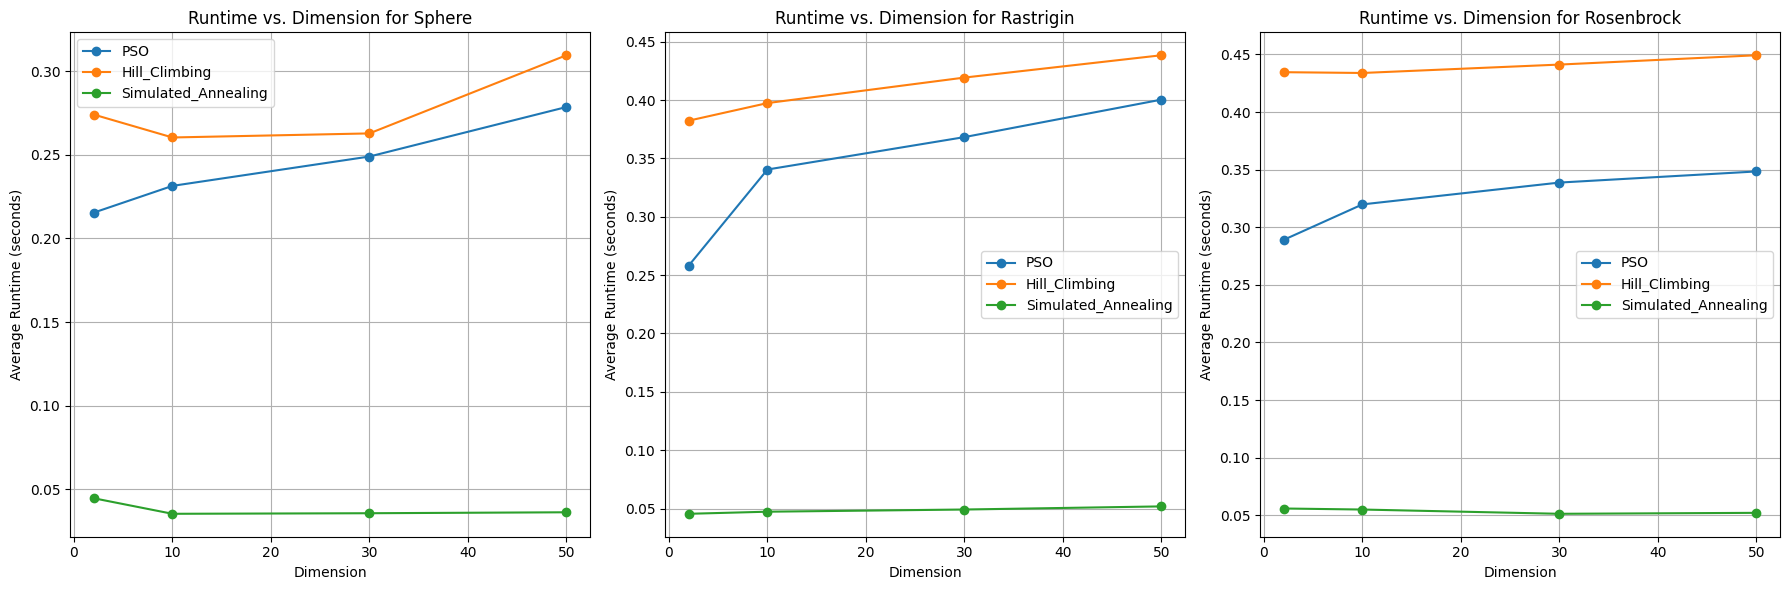


Generated runtime vs. dimension plots for all objective functions.


In [ ]:
# 3. Create plots for runtime analysis
print("\n" + "=" * 60)
print("Visualizing Runtime vs. Dimension")
print("=" * 60)

# Create a figure with subplots for each objective function
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten() # Flatten in case of multiple rows/columns

objective_function_names = list(runtime_analysis_results[list(runtime_analysis_results.keys())[0]].keys())

for i, func_name in enumerate(objective_function_names):
    ax = axes[i]
    ax.set_title(f"Runtime vs. Dimension for {func_name}")
    ax.set_xlabel("Dimension")
    ax.set_ylabel("Average Runtime (seconds)")
    ax.grid(True)

    # Extract dimensions and runtimes for plotting
    dimensions = sorted(runtime_analysis_results.keys()) # Ensure dimensions are in order

    for algo_name in ['PSO', 'Hill_Climbing', 'Simulated_Annealing']:
        avg_runtimes = [runtime_analysis_results[dim][func_name][algo_name]['avg_runtime'] for dim in dimensions]
        ax.plot(dimensions, avg_runtimes, marker='o', label=algo_name)

    ax.legend()

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

print("\nGenerated runtime vs. dimension plots for all objective functions.")

# **Visualization**

In [ ]:
# Designed to run on GG Colab only.
class VisualizedPSO:
    """
    Particle Swarm Optimization with real-time visualization.
    """

    def __init__(self, n_particles=20, bounds=None, w=0.5, c1=2.0, c2=2.0,
                 max_iterations=100, v_max=0.5, convergence_threshold=0.001):
        self.n_particles = n_particles
        self.n_dimensions = 2  # Fixed to 2D for visualization
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iterations = max_iterations
        self.v_max = v_max
        self.convergence_threshold = convergence_threshold

        # Set bounds
        if bounds is None:
            self.lower_bounds = np.array([-5.0, -5.0])
            self.upper_bounds = np.array([5.0, 5.0])
        else:
            self.lower_bounds = np.array(bounds[0])
            self.upper_bounds = np.array(bounds[1])

        # Initialize particles
        self.positions = np.random.uniform(
            self.lower_bounds,
            self.upper_bounds,
            (n_particles, 2)
        )

        # Initialize velocities with random values
        self.velocities = np.random.uniform(
            -v_max,
            v_max,
            (n_particles, 2)
        )

        # Personal best
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(n_particles, np.inf)

        # Global best
        self.global_best_position = None
        self.global_best_score = np.inf

        # History
        self.history = []
        self.iteration = 0

    def optimize_with_visualization(self, objective_function, animate=True,
                                    show_3d=False, interval=100):
        """
        Run PSO with real-time visualization.

        Parameters:
        -----------
        objective_function : callable
            Function to minimize
        animate : bool
            Whether to show animation or just final result
        show_3d : bool
            Whether to show 3D surface plot
        interval : int
            Animation interval in milliseconds
        """
        self.objective_function = objective_function

        # Create mesh grid for contour plot
        x = np.linspace(self.lower_bounds[0], self.upper_bounds[0], 100)
        y = np.linspace(self.lower_bounds[1], self.upper_bounds[1], 100)
        self.X, self.Y = np.meshgrid(x, y)

        # Calculate Z values for the mesh
        self.Z = np.zeros_like(self.X)
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[1]):
                self.Z[i, j] = objective_function(np.array([self.X[i, j], self.Y[i, j]]))

        if show_3d:
            self._visualize_3d()

        if animate:
            self._animate()
        else:
            self._static_visualization()

    def _update_particles(self):
        """Update particle positions and velocities for one iteration"""
        # Evaluate all particles
        for i in range(self.n_particles):
            score = self.objective_function(self.positions[i])

            # Update personal best
            if score < self.personal_best_scores[i]:
                self.personal_best_scores[i] = score
                self.personal_best_positions[i] = self.positions[i].copy()

            # Update global best
            if score < self.global_best_score:
                self.global_best_score = score
                self.global_best_position = self.positions[i].copy()

        # Store history
        self.history.append(self.global_best_score)

        # Update velocities and positions
        r1 = np.random.random((self.n_particles, 2))
        r2 = np.random.random((self.n_particles, 2))

        cognitive = self.c1 * r1 * (self.personal_best_positions - self.positions)
        social = self.c2 * r2 * (self.global_best_position - self.positions)

        self.velocities = self.w * self.velocities + cognitive + social

        # Limit velocities
        self.velocities = np.clip(self.velocities, -self.v_max, self.v_max)

        # Update positions
        self.positions = self.positions + self.velocities

        # Handle boundaries - random reinitialization for out-of-bounds particles
        for i in range(self.n_particles):
            for dim in range(2):
                if self.positions[i, dim] < self.lower_bounds[dim] or \
                   self.positions[i, dim] > self.upper_bounds[dim]:
                    self.positions[i, dim] = np.random.uniform(
                        self.lower_bounds[dim],
                        self.upper_bounds[dim]
                    )

        self.iteration += 1

        # Check convergence
        if abs(self.global_best_score) < self.convergence_threshold:
            return True
        return False

    def _animate(self):
        """Create animated visualization"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle('Particle Swarm Optimization', fontsize=16, fontweight='bold')

        def update(frame):
            if self.iteration >= self.max_iterations:
                return

            converged = self._update_particles()

            # Clear axes
            ax1.clear()
            ax2.clear()

            # Plot contour
            contour = ax1.contourf(self.X, self.Y, self.Z, levels=30, cmap='viridis', alpha=0.7)
            ax1.contour(self.X, self.Y, self.Z, levels=15, colors='black', alpha=0.2, linewidths=0.5)

            # Plot particles
            ax1.scatter(self.positions[:, 0], self.positions[:, 1],
                       c='red', s=100, marker='*', edgecolors='black',
                       linewidth=0.5, label='Particles', zorder=5)

            # Plot velocity arrows
            for i in range(self.n_particles):
                ax1.arrow(self.positions[i, 0], self.positions[i, 1],
                         self.velocities[i, 0] * 0.5, self.velocities[i, 1] * 0.5,
                         head_width=0.15, head_length=0.1, fc='black',
                         ec='black', alpha=0.6, zorder=4)

            # Plot global best
            if self.global_best_position is not None:
                ax1.scatter(self.global_best_position[0], self.global_best_position[1],
                           c='lime', s=200, marker='X', edgecolors='black',
                           linewidth=2, label='Global Best', zorder=6)

            ax1.set_xlim(self.lower_bounds[0], self.upper_bounds[0])
            ax1.set_ylim(self.lower_bounds[1], self.upper_bounds[1])
            ax1.set_xlabel('X', fontsize=12)
            ax1.set_ylabel('Y', fontsize=12)
            ax1.set_title(f'Iteration: {self.iteration} | Best Score: {self.global_best_score:.6f}',
                         fontsize=12, fontweight='bold')
            ax1.legend(loc='upper right')
            ax1.grid(True, alpha=0.3)

            # Plot convergence history
            if len(self.history) > 0:
                ax2.plot(self.history, 'b-', linewidth=2)
                ax2.set_xlabel('Iteration', fontsize=12)
                ax2.set_ylabel('Best Score', fontsize=12)
                ax2.set_title('Convergence History', fontsize=12, fontweight='bold')
                ax2.grid(True, alpha=0.3)
                ax2.set_xlim(0, self.max_iterations)

            plt.tight_layout()

            if converged:
                print(f"\nConverged at iteration {self.iteration}!")
                print(f"Best position: {self.global_best_position}")
                print(f"Best score: {self.global_best_score:.8f}")

        # Store animation object to prevent garbage collection
        self.anim = FuncAnimation(fig, update, frames=self.max_iterations,
                                  interval=100, repeat=False)

        # For Google Colab compatibility
        try:
            from IPython.display import HTML
            return HTML(self.anim.to_jshtml())
        except:
            plt.show()
            return None

    def _static_visualization(self):
        """Run optimization and show final result"""
        for i in range(self.max_iterations):
            converged = self._update_particles()
            if converged:
                break

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plot contour
        contour = ax1.contourf(self.X, self.Y, self.Z, levels=30, cmap='viridis', alpha=0.7)
        ax1.contour(self.X, self.Y, self.Z, levels=15, colors='black', alpha=0.2, linewidths=0.5)
        plt.colorbar(contour, ax=ax1)

        # Plot final particle positions
        ax1.scatter(self.positions[:, 0], self.positions[:, 1],
                   c='red', s=100, marker='*', edgecolors='black', linewidth=0.5)
        ax1.scatter(self.global_best_position[0], self.global_best_position[1],
                   c='lime', s=200, marker='X', edgecolors='black', linewidth=2)

        ax1.set_title(f'Final Result - Best Score: {self.global_best_score:.6f}')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')

        # Plot convergence
        ax2.plot(self.history, 'b-', linewidth=2)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Best Score')
        ax2.set_title('Convergence History')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def _visualize_3d(self):
        """Create 3D surface plot"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot surface
        surf = ax.plot_surface(self.X, self.Y, self.Z, cmap='viridis',
                              alpha=0.6, edgecolor='none')

        # Initial particle positions
        z_values = np.array([self.objective_function(pos) for pos in self.positions])
        ax.scatter(self.positions[:, 0], self.positions[:, 1], z_values,
                  c='red', s=100, marker='*', edgecolors='black', linewidth=0.5)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('f(X, Y)')
        ax.set_title('3D Objective Function Surface')

        plt.colorbar(surf, ax=ax, shrink=0.5)
        plt.show()

Particle Swarm Optimization Visualization Demo (2D)

Visualizing Sphere Function (2D)
------------------------------------------------------------


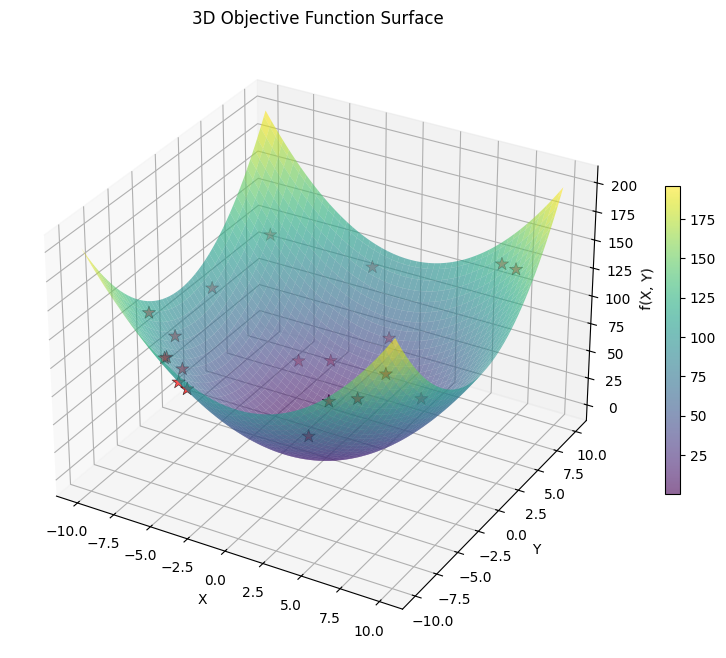


Visualizing Rastrigin Function (2D)
------------------------------------------------------------


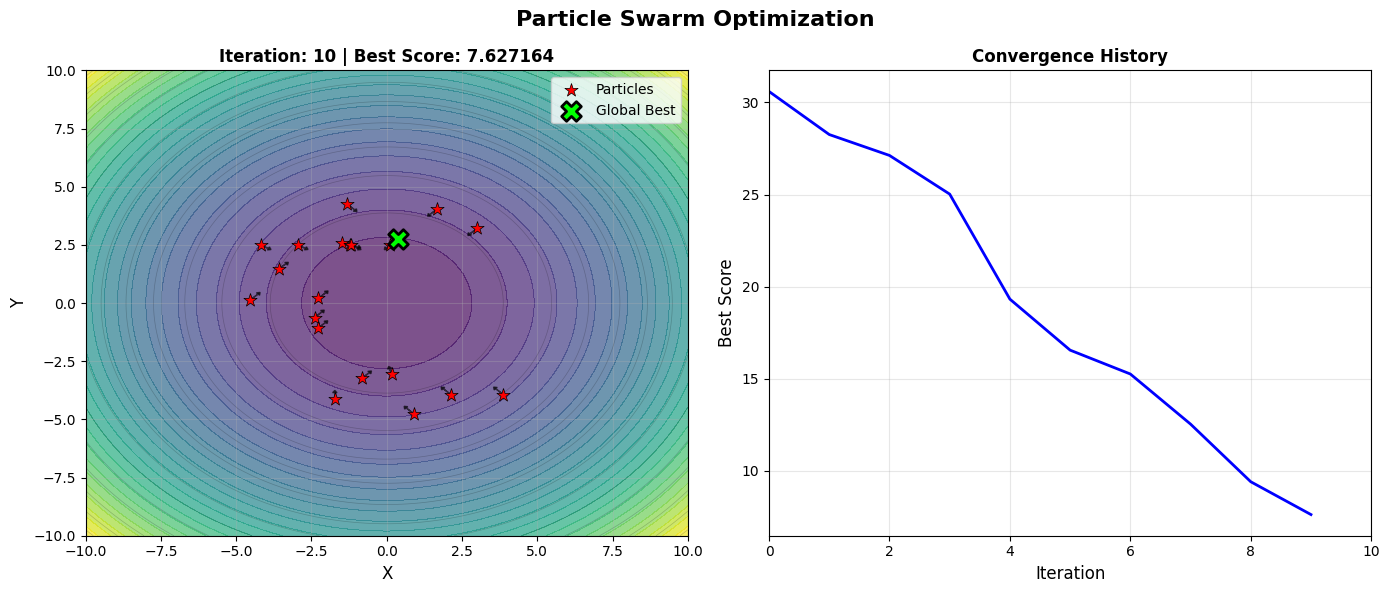

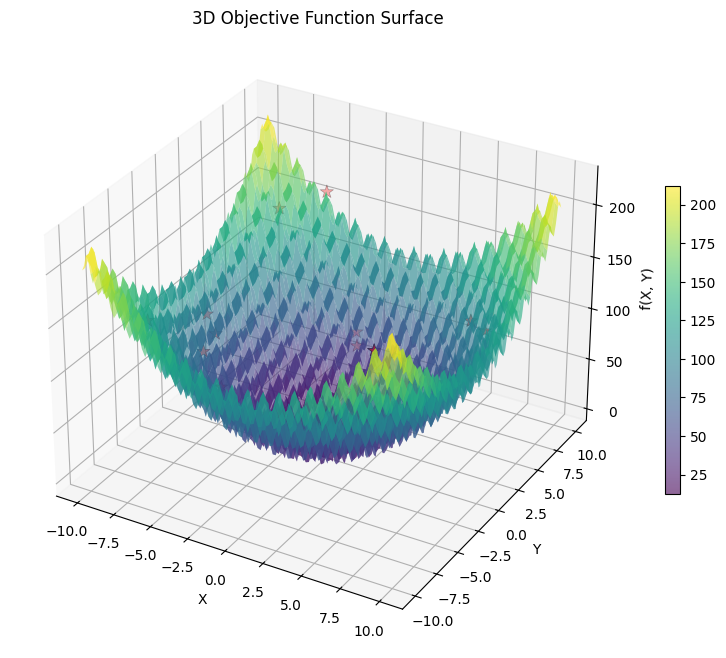


Visualizing Rosenbrock Function (2D)
------------------------------------------------------------


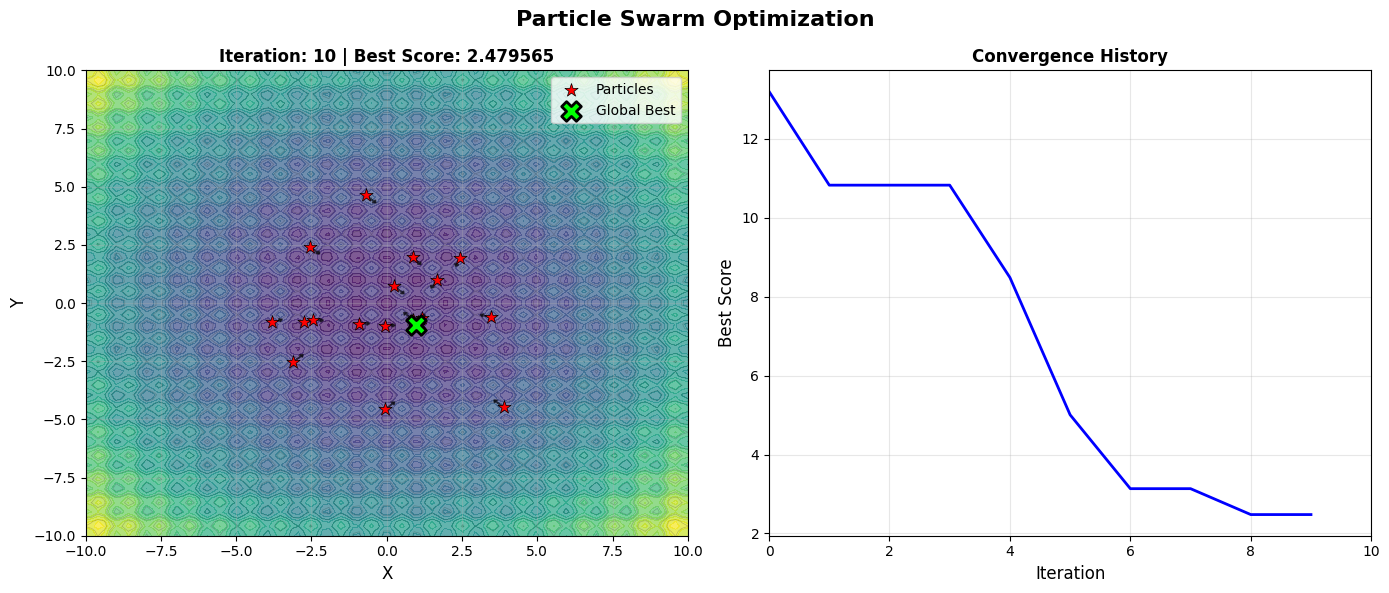

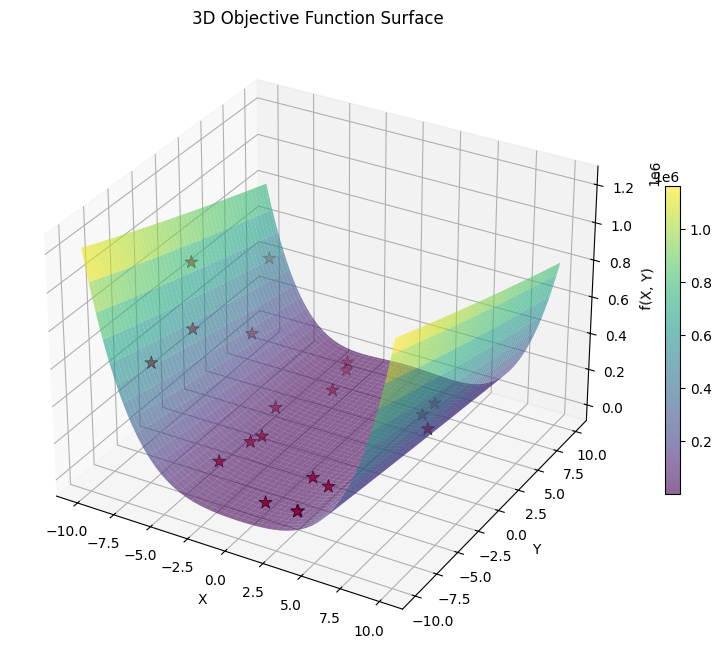

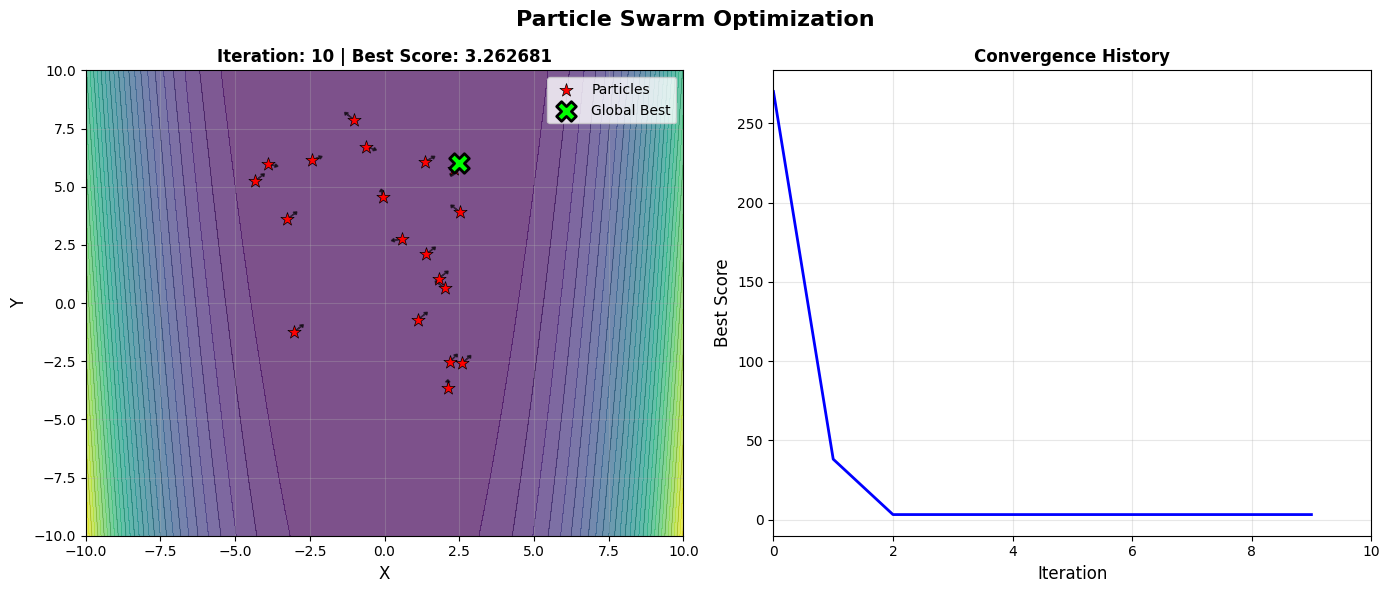

In [ ]:
# --- Visualization Demo ---

print("=" * 60)
print("Particle Swarm Optimization Visualization Demo (2D)")
print("=" * 60)

# Sphere Function
print("\nVisualizing Sphere Function (2D)")
print("-" * 60)
sphere_bounds_2d = ([-10, -10], [10, 10])
pso_sphere = VisualizedPSO(bounds=sphere_bounds_2d, max_iterations=10)
anim_sphere = pso_sphere.optimize_with_visualization(sphere_function, animate=True, show_3d=True)

# Rastrigin Function
print("\nVisualizing Rastrigin Function (2D)")
print("-" * 60)
rastrigin_bounds_2d = ([-10, -10], [10, 10])
pso_rastrigin = VisualizedPSO(bounds=rastrigin_bounds_2d, max_iterations=10)
anim_rastrigin = pso_rastrigin.optimize_with_visualization(rastrigin_function, animate=True, show_3d=True)

# Rosenbrock Function
print("\nVisualizing Rosenbrock Function (2D)")
print("-" * 60)
rosenbrock_bounds_2d = ([-10, -10], [10, 10])
pso_rosenbrock = VisualizedPSO(bounds=rosenbrock_bounds_2d, w=0.6, c1=2.0, c2=2.0, max_iterations=10)
anim_rosenbrock = pso_rosenbrock.optimize_with_visualization(rosenbrock_function, animate=True, show_3d=True)
